In [59]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles
from sklearn import datasets
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<h4> Zadanie1: Czy jest możliwe żeby dwie pierwsze komponenty objaśniały 100% wariancji danych 50D? Jeśli nie - udowodnij, jeśli tak - podaj przykład.

Jest to możliwe, jeśli w wymiarach 3-50 znajdują się dokładnie takie same wartości dla każdej z danych. Wtedy jedyna wariancja znajduje się w 1 i 2 wymiarze. Taka sytuacja byłaby również chyba możliwa, gdyby wartości w wymiarach 3-50 były kombinacją liniową wartości poprzednich dwóch wymiarów.

<h4> Zadanie2: Rozważ dane $iris$. Dokonaj standaryzacji a następnie przeprowadź algorytm PCA. Która z cech wydaje się najistoniejsza? Ile komponentów wystarczająco dobrze opisuje te dane? Skomentuj otrzymane wyniki.

In [60]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)


In [61]:
pca = PCA()
pca.fit(X_std)

PCA()

In [62]:
print(pca.explained_variance_ratio_)


[0.72962445 0.22850762 0.03668922 0.00517871]


Pierwszy i drugi komponent opisują 96% wariancji, także wystarczyłby tylko te dwa komponenty, aby wystarczająco dobrze opisać te dane. 





Text(0, 0.5, 'Sepal width')

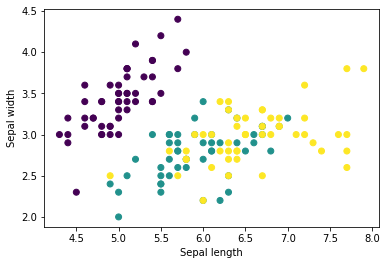

In [63]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

Text(0, 0.5, 'Petal length')

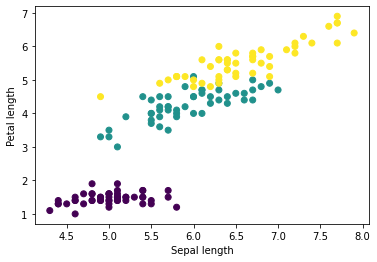

In [64]:
plt.scatter(X[:, 0], X[:, 2], c=y)
plt.xlabel("Sepal length")
plt.ylabel("Petal length")

Petal length wydaje się istotny

Text(0, 0.5, 'Petal width')

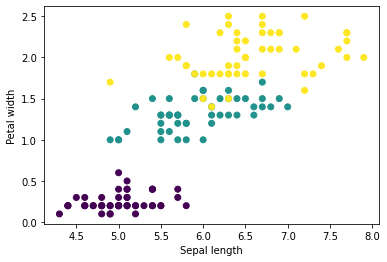

In [65]:
plt.scatter(X[:, 0], X[:, 3], c=y)
plt.xlabel("Sepal length")
plt.ylabel("Petal width")

Petal width nieznacznie gorzej rozdzieliłby obserwacje.

Text(0, 0.5, 'Petal length')

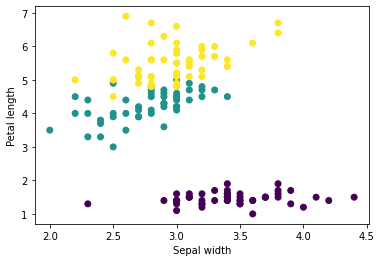

In [66]:
plt.scatter(X[:, 1], X[:, 2], c=y)
plt.xlabel("Sepal width")
plt.ylabel("Petal length")

Ponownie, Petal length daje dobrą podstawę do rozdziału.

Text(0, 0.5, 'Petal width')

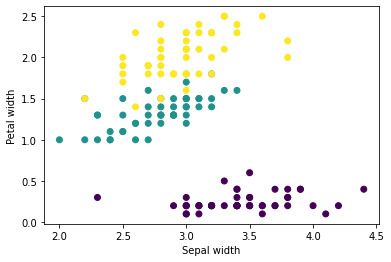

In [67]:
plt.scatter(X[:, 1], X[:, 3], c=y)
plt.xlabel("Sepal width")
plt.ylabel("Petal width")

Petal width na takim scatterplocie przy poziomych liniach przy około 1,6 i 0,75 miałby problem tylko dla 5 żółtych obserwacji.

Text(0, 0.5, 'Petal width')

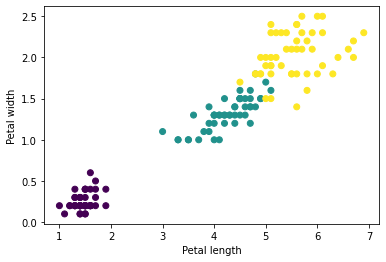

In [68]:
plt.scatter(X[:, 2], X[:, 3], c=y)
plt.xlabel("Petal length")
plt.ylabel("Petal width")

Dla Petal length i width możemy zobaczyć podział i poziomo i pionowo, Petal length tylko trochę lepszy.

<h4> Zadanie3: Rozważ jeszcze raz dane dotyczące twarzy różnych osób (fetch_lw_people) rozważane podczas ćwiczenia z SVM. Zastosuj podobnie jak wtedy PCA ze 150 komponentnami. Jaki procent wariancji opisują te komponenty? Narsuj kilka początkowych komponentów (wektory własne); oczywiście podobnie jak obrazy są to wektory $64\cdot47$ wymiarowe - przed narysowaniem należy jeszcze zastosować metodę reshape. Zastanów się nad ich interpretacją.

In [78]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)


In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 150, whiten = True, random_state = 42)


In [80]:
X = faces.data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [81]:
pca.fit(X)

PCA(n_components=150, random_state=42, whiten=True)

In [82]:
print(pca.explained_variance_ratio_)

[0.18782714 0.1455033  0.07100126 0.06029    0.05040156 0.02936217
 0.02469286 0.02047786 0.01968621 0.01891433 0.01561241 0.01469925
 0.01214479 0.01095759 0.0104282  0.0097199  0.00906832 0.00877007
 0.00813053 0.00704723 0.00682862 0.00647883 0.00603494 0.0057839
 0.00532262 0.00520683 0.00500025 0.00476451 0.00452436 0.00425207
 0.00405164 0.0038007  0.00359863 0.00350867 0.00347822 0.00324879
 0.00314475 0.00310487 0.00307685 0.00289922 0.00282612 0.00274748
 0.00272808 0.0025997  0.00246546 0.002382   0.00235044 0.0023152
 0.00227269 0.00221832 0.00210567 0.00205797 0.00202996 0.0020065
 0.00195754 0.00195432 0.00188095 0.00182764 0.00176693 0.00175856
 0.00174926 0.0016632  0.00161306 0.00158565 0.00156575 0.00152886
 0.00149985 0.00146118 0.00145263 0.00141042 0.0014052  0.00136415
 0.00136122 0.00131622 0.0012927  0.00125564 0.00124939 0.00123095
 0.00120673 0.0011877  0.00117404 0.00115424 0.00113158 0.00110185
 0.00108859 0.00107474 0.00105294 0.00103629 0.00101902 0.0010113

Pierwszy komponent opisuje 18,7% wariancji. Pierwsze 6 komponentów opisuje 54% wariancji. Pozostałe komponenty opisują po 2,5% - 0,04% wariancji każdy. Pierwsze 30 komponentów opisuje ponad 80% całej wariancji.



In [ ]:
faces.images.shape

(1140, 62, 47)

In [ ]:
components = pca.components_.reshape((150, 62, 47))


In [ ]:
components.shape

(150, 62, 47)

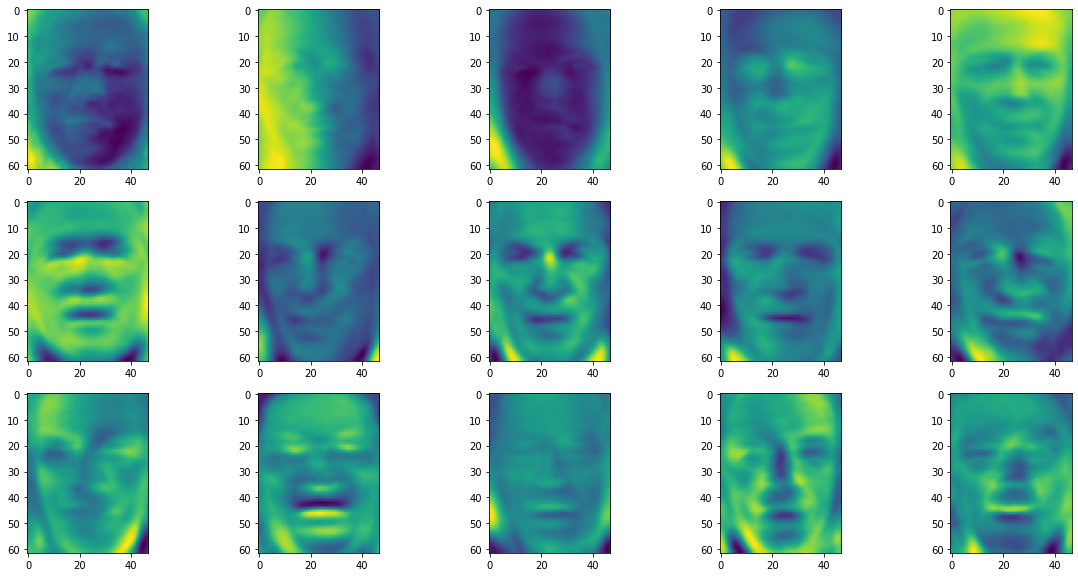

In [89]:
fig, axis = plt.subplots(3,5,figsize=(20,10))
for i in range(3):
  for j in range(5):
    axis[i,j].imshow(components[5 * i + j])


Twarze są w większym zbliżeniu. Mam wrażenie, że funkcja fetch_lfw_people teraz zwraca domyślnie zestaw danych z przybliżeniem, a nie portrety.
Nie ma to na szczęście znaczenia w dalszej interpretacji komponentów.

Kolor żółty w tej skali symbolizuje największe wypełnienie danego piksela. Możemy interpretować żółty kolor w powyższych komponentach jako najważniejsze ich obszary. Z wartości pokazanych w explained_variance_ratio_ możemy odczytać, że pierwszy komponent odpowiada za dużą wariancję, bo aż 18,7% całej wariancji z 150 komponentów. Taka wartość ma sens, ponieważ spodziewamy się, że w tle, a nie na samej twarzy, będzie zmieniać się dużo pomiędzy poszczególnymi obrazkami. Przeglądając kolejne komponenty, możemy również wskazać "przyciemnione" (rozjaśnione) obszary, które są najważniejsze w danym komponencie.

<h4> Zadanie4: Zauważ, że wykresy te różnią się zakresem wartości - czy to zrozumiałe?

Udaje nam się odtworzyć informację o częstotliwości, a nie o amplitudzie. Nie da się odtworzyć informacji o amplitudzie, ponieważ wstępne funkcje mają współczynniki, które następnie zostają przemnożone i już nie da się ich odtworzyć.